# Notes
* Linear regression with multiple input features is actually quite simple. Where in a $x$ vs $y$ regression your formula is just $\vec{y}=\beta_1 \vec{x} + \beta_0$, with multiple input features $x_1, x_2, x_2$, your formula is just $\vec{y}=\beta_1\vec{x_1}+\beta_2\vec{x_2}+\beta_3\vec{x_3}+\beta_0$ 
* LASSO loss function is $\Sigma(\mathrm{residuals})^2+\Sigma|\beta|$ 
* The only difference between Ridge and LASSO regression is that the regularization term in LASSO is in terms of absolute value, which has a huge impact on the model. Thus, LASSO overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients $\beta$ but also by actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage.
* When you set ```alpha = 0``` in LASSO, this is equivalent to an ordinary least squares
* What is the difference between sparse and...ordinary(?) data? 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

plt.rcParams['font.family']='serif'

In [33]:
cancer = load_breast_cancer()

X = cancer.data
Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,Y)

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['outcome'] = Y

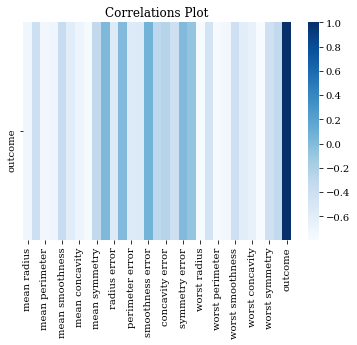

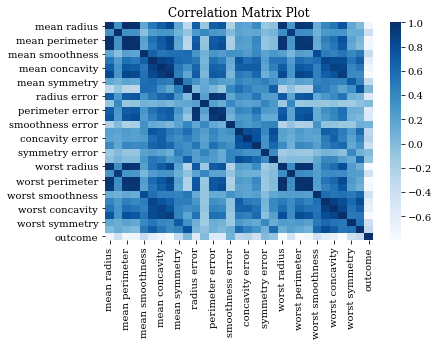

In [30]:
# Correlation matrix plot
corr = cancer_df.corr()

sns.heatmap(corr.iloc[30:, 0:], cmap='Blues')

plt.title('Correlations Plot')

plt.show()

sns.heatmap(corr, cmap='Blues')
plt.title('Correlation Matrix Plot')
plt.show()

In [46]:
regressor = Lasso(1, fit_intercept=True, max_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

predictions[predictions>0.5] = 1
predictions[predictions<=0.5] = 0 

acc = accuracy_score(predictions, y_test.flatten())

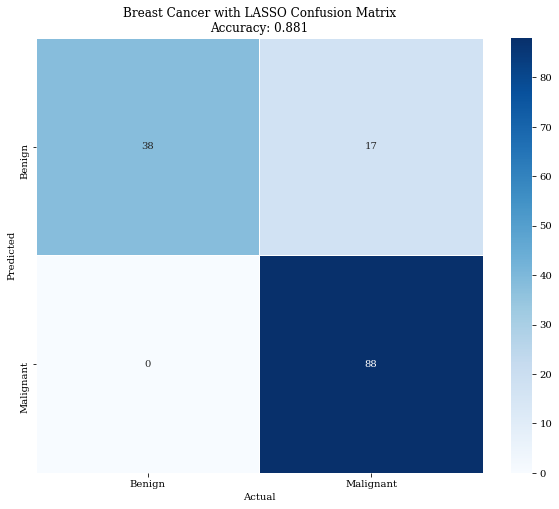

In [51]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.family']='serif'

cm = confusion_matrix(y_test.flatten(), predictions)

ticks = ['Benign', 'Malignant']
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=.5, yticklabels=ticks, xticklabels=ticks)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Breast Cancer with LASSO Confusion Matrix\nAccuracy: '+str(round(acc, 3)))

plt.show()